In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, absolute_import
import matplotlib.pyplot as plt
import numpy as np

## Trying out multiple trajectories with Russ's example code and Pendulum env

In [3]:
from multiple_traj_opt import MultipleTrajOpt


#### Construct the inital MathematicalProgram
num_trajectories = 1
num_samples      = 15
initial_conditions = (
    None,
#     "1",
#     "2",
#     "3",
)[0]
mto = MultipleTrajOpt("pendulum",
                      num_trajectories, 
                      num_samples,
                      initial_conditions=initial_conditions)

#### Add a neural network!
from nn_system.networks import *
# kNetConstructor = lambda: FC(2)
kNetConstructor = lambda: FCBIG(2)
# kNetConstructor = lambda: MLPSMALL(2)
# kNetConstructor = lambda: MLP(2)
reg_type = "No"
# reg_type = "L1"
# reg_type = "L2"
mto.add_nn_params(kNetConstructor,
                  initialize_params = True, 
                  reg_type          = reg_type,
                  enable_constraint = True)

In [4]:
# Introduce a scaling factor in (0, 1] that can be used to shrink the initial
# conditions regions used for policy rollouts, so we can check an area SMALLER
# than that which was used for dircol calculations!
scaling = 0.5
mto.add_multiple_trajectories_visualization_callback(
    "pendulum")#,
#     initial_conditions=lambda ti: np.array(initial_conditions2(ti))*scaling )

 1

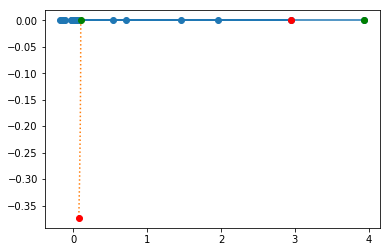

 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18

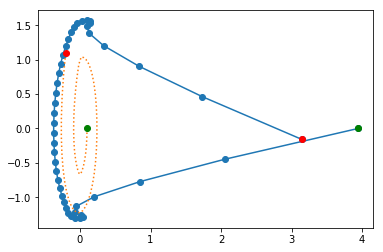

 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35

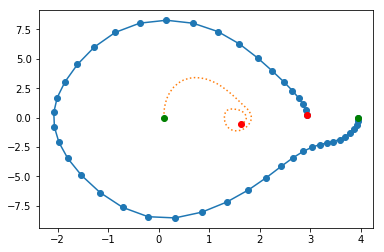

 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52

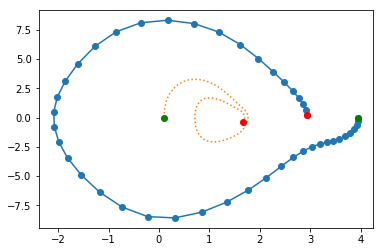

 53 54 55 56 57 58 59SolutionResult.kSolutionFound


In [5]:
result = mto.Solve()
print(result)

In [10]:
ti = 0    
mto.print_pi_divergence(ti)

u_val-Pi(x_val)= diff
(-4.25)-(-4.33)=  0.07
(-5.30)-(-5.20)= -0.10
(-2.39)-(-2.49)=  0.10
(-1.04)-(-0.94)= -0.10
(-0.45)-(-0.39)= -0.06
(-0.13)-(-0.20)=  0.08
( 0.15)-( 0.17)= -0.02
( 0.38)-( 0.39)= -0.01
( 0.63)-( 0.53)=  0.10
( 1.10)-( 1.10)=  0.01
( 1.60)-( 1.52)=  0.08
( 1.36)-( 1.29)=  0.07
( 0.49)-( 0.39)=  0.10
(-0.46)-(-0.44)= -0.02
(-0.62)-(-0.56)= -0.06


In [18]:
ti = 0
ani = mto.render_policy(ti)
from IPython.display import HTML
HTML(ani.to_html5_video())

/home/rverkuil/integration/integration/local/lib/python2.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/rverkuil/integration/integration/local/lib/python2.7/site-packages/scipy/interpolate/interpolate.py:610: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


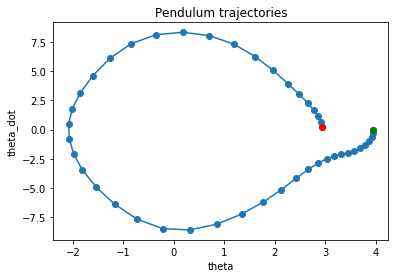

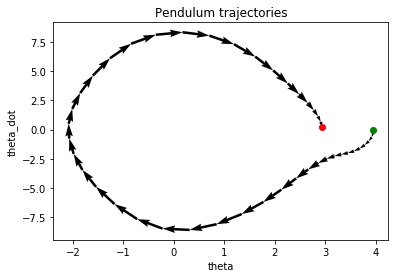

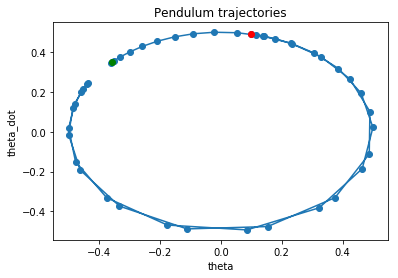

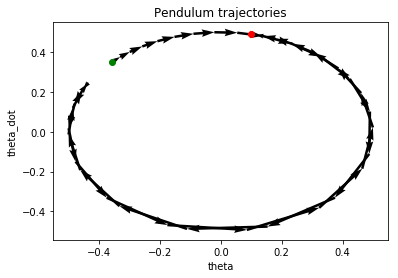

In [31]:
mto.plot_all_trajectories("state_scatter")
mto.plot_all_trajectories("state_quiver")
mto.plot_all_trajectories("tip_scatter")
mto.plot_all_trajectories("tip_quiver")

### Visualize the found trajectories

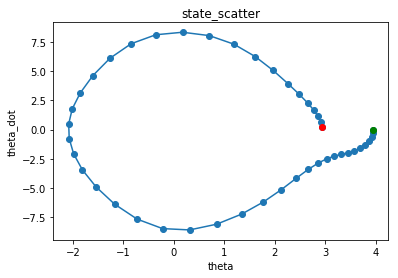

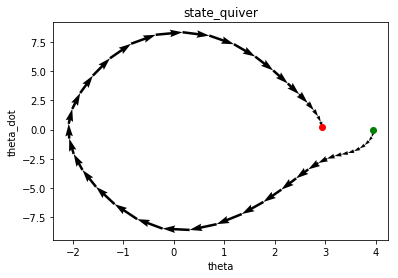

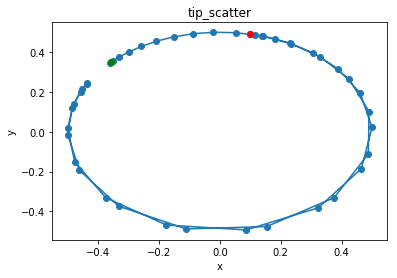

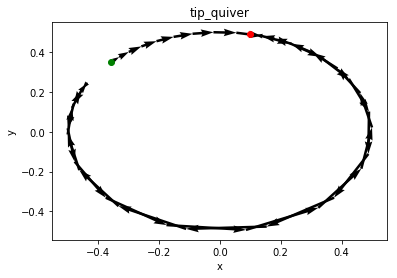

In [27]:
###### plt.figure()
# for ti in range(num_trajectories):
# for ti in [0]:

ti = 0
mto.plot_single_trajectory(ti, "state_scatter")
mto.plot_single_trajectory(ti, "state_quiver")
mto.plot_single_trajectory(ti, "tip_scatter")
mto.plot_single_trajectory(ti, "tip_quiver")

ani2 = mto.render_single_trajectory(ti)
HTML(ani2.to_html5_video())